## 5.1 Dimensions and Dimensional Analysis  <a class="tocSkip">

### Lecture 5.1
### Stephen Neethling, s.neethling@imperial.ac.uk

## Outline  <a class="tocSkip">

1. The Advection-Diffusion Equation <br>
    1.1. Non-dimensionalising the equation <br>
2. Dimensional Analysis <br>
    2.1. Buckingham-Pi Theory <br>
3. Instabilities <br>
    3.1. Rayliegh-Taylor <br>
    3.2. Kevin-Helmholtz <br>
    3.3. Plateau-Rayleigh <br>
    

## Learning Objectives

- Learn how to non-dimensionalise variables and equations
- Understand how to solve the advection-diffusion equation using numerical and analytical methods
- Learn how to carry out a dimensional analysis using Buckingham-Pi Theory
- Learn how to apply dimensional analysis to stability problems


In [2]:
# Import packages for notebook here
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

## Advection-Diffusion Equation 

To demonstrate dimensional analysis, we shall study the advection-diffusion equation. 

Consider a fluid with a chemical dissolved in it. The chemical will move with the fluid, but it will also spread out due to diffusion. This is the classical example of advection-diffusion, but the equation appears in many other contexts as well (e.g. in semiconductor physics). Even the Navier-Stokes equation has an advection-diffusion equation at its heart, although for momentum rather than substance (viscosity results in the diffusion of momentum).

$$
\large{\mathbf{f = v }}C - D \nabla C 
\hspace{4cm}
\frac{\partial C}{\partial t} = - \nabla \cdot \mathbf{f}
$$

Where the left-hand side equation describes the flux equation and the right-hand side is the continuity equation.

If we substitute the flux equation into the continuity equation we get the following equation (assuming that the diffusion coefficient is constant):

$$
\large{\frac{\partial C}{\partial t}} = - C \nabla \cdot \mathbf{v} - \mathbf{v} \cdot \nabla C + D \nabla^2 C
$$

If the fluid volume is conserved (i.e  $ \nabla \cdot \mathbf{v} = 0$) then we arrive at the more familiar form of the advection-diffusion equation: 

$$
\large{\frac{\partial C}{\partial t}} = - \mathbf{v} \cdot \nabla C + D \nabla^2 C
$$

### Advection-Diffusion in 1D

$$
\large{\frac{\partial C}{\partial t}} = - v\frac{\partial C}{\partial x} + D\frac{\partial^2 C}{\partial^2 x}
$$

The 1st derivative is the term associated with the motion of the species due to the movement of the liquid (advection). Because of this 1st order terms are often referred to as "advective" even if the underlying physical mechanism isn't advection.

The 2nd derivative is the term associated with the diffusion of the species. Similarly to above, the 2nd order terms are often referred to as "diffusive" even if the underlying mechanism isn't diffusion. 

This equation is sometimes called __Burger's Equation__. 

### Example: Transport and Diffusion across a membrane 

Let us consider a membrane through which a fluid is being passed:
- The fluid has a superficial velocity ___v___ and the chemical has diffusivity, ___D___. 
- Within the fluid is a chemical that has concentration $C_0$ on the upstream side
- On the downstream side of the membrane, it rapidly reacts and can be assumed to have a concentration of zero. 
- The membrane has a thickness of ___h___.

At first glance it appears that there are 4 different things that you can adjust in this problem:

- $C_0, \hspace{0.1cm} h, \hspace{0.1cm} D \hspace{0.1cm} \text{and} \hspace{0.1cm} v$

However, how many of these variables are actually independent? Are there combinations of things that we can change without changing the form of the solution?

### Non-dimensionalising the equation 

This is a useful way of finding the number of actual parameters in a problem. Additonally, this allows for the the underlying dependencies to be determined in a way that is independent of, for instance, the scale of the system. 

We start by introducing dimensionless versions of the dependent and independent variables. Concentration and distance have obvious ways of being made dimensionless: 

$$
C^* = \frac{C}{C_0}
\hspace{3cm}
x^* = \frac{x}{h}
$$

With time there are two options, this is because there is no variable that only has units of time and it is found in two different variables, ___v___ and ___D___. As such we can choose either an advection time scale or a diffusion time scale. 

$$
t^* = \frac{v t}{h}
\hspace{1.5cm}
\text{OR}
\hspace{1.5cm}
t^* = \frac{Dt}{h^2}
$$

Note that there isn't a "correct" choice, with the appropriate one depending on the system and personal preference.

Substituting for the dimensional variables and rearranging the equation leads to the following expression (using the diffusive time scale): 

$$
\frac{\partial C^*}{\partial t^*} = - \color{blue}{\frac{vh}{D}} \frac{\partial C^*}{\partial x^*} + \frac{\partial^2 C^*}{\partial x^{*2}}
$$

$$
C^* = \frac{C}{C_0} 
\hspace{2cm} 
x^* = \frac{x}{h}
\hspace{2cm} 
t^* = \frac{Dt}{h^2}
$$

Note that the dimensionless solution only depends on one dimensionless number - the __Peclet Number__. 

#### Peclet Number

$$
Pe = \frac{vh}{D}
$$

As with most dimensionless groups, the Peclet number is a ratio of two effects. It represents the relative importance of advection compared to diffusion. 

- At low Peclet numbers ($Pe << 1$) diffusion dominates
- At high Peclet numbers ($Pe >> 1$) advection dominates

### Numerical Solution

The explicit numerical solution for the advection-diffusion equation based on finite differencing is relatively straight forward to implement. This is known as a Forward Time Centered Space (FTCS) scheme:

$
\large{\frac{\partial C^*}{\partial t^*} \approx \frac{C\hspace{0.1cm}(x^*, \hspace{0.1cm} t^* + \Delta t^*) \hspace{0.1cm} - \hspace{0.1cm} C\hspace{0.1cm}(x^*, \hspace{0.1cm} t^*)}{\Delta t^*}}
$

$
\large{\frac{\partial C^*}{\partial x^*} \approx \frac{C\hspace{0.1cm}(x^* + \Delta x^*, \hspace{0.1cm} t^*) \hspace{0.1cm} - \hspace{0.1cm} C\hspace{0.1cm}(x^* - \Delta x^*, \hspace{0.1cm} t^*)}{2\Delta x^*}}
$

$
\large{\frac{\partial^2 C^*}{\partial x^{*2}} = \frac{C \hspace{0.1cm} (x^* + \Delta x^*, \hspace{0.1cm} t^*) \hspace{0.1cm} + \hspace{0.1cm} C \hspace{0.1cm} (x^* - \Delta x^*, \hspace{0.1cm} t^*) \hspace{0.1cm} - \hspace{0.1cm} 2C \hspace{0.1cm} (x^*, \hspace{0.1cm} t^*)}{\Delta x^{*2}}}
$

### Upwind Schemes

Advection (1st order) terms can cause numerical instability, especially for explicit solvers and when diffusive (2nd order) terms are weak. This means that we can use the central difference method for when Pe is small (i.e when diffusion dominates), but can be problematic for large Pe (i.e when advection dominates). 

One way to improve stability is to use an upwind scheme. We can use a forward or backwards differencing scheme depending on the sign of the advective velocity. 

$$
\large{v} \frac{\partial C^*}{\partial x^*} \approx v 
\begin{cases}
\frac{C\hspace{0.1cm}(x^*, \hspace{0.1cm} t^*) \hspace{0.1cm} - \hspace{0.1cm} C\hspace{0.1cm}(x^* - \hspace{0.1cm} \Delta x^*, \hspace{0.1cm} t^*)}{\Delta t^*} \hspace{1cm} \text{if} \hspace{0.1cm} v > 0 \\
\frac{C\hspace{0.1cm}(x^* + \Delta x^*, \hspace{0.1cm} t^*) \hspace{0.1cm} - \hspace{0.1cm} C\hspace{0.1cm}(x^*, \hspace{0.1cm} t^*)}{\Delta t^*} \hspace{1cm} \text{if} \hspace{0.1cm} v < 0  \\
\end{cases}
$$

The governing equation: 

$$
\large{\frac{\partial C^*}{\partial t^*} = - Pe\frac{\partial C^*}{\partial x^*} + \frac{\partial^2 C^*}{\partial x^{*2}}}
$$

can then be approximated as: 

$$
C^*_{i, \hspace{0.1cm} j + 1} \approx C^*_{i, \hspace{0.1cm} j} + \Delta t^* \Biggl(\frac{-Pe \hspace{0.1cm} (C^*_{i, \hspace{0.1cm} j} - C^*_{i - 1, \hspace{0.1cm} j})}{\Delta x^*} + \frac{(C^*_{i + 1, \hspace{0.1cm}j} + C^*_{i - 1, \hspace{0.1cm}j} - 2C*_{i, \hspace{0.1cm}j})}{\Delta x^{*2}} \Biggr)
$$

For stability in this explicit scheme: 
The dimensionless rate of advection is _Pe_, while the dimensionless diffusion coefficient 1.

$$
\Delta t^* << min \Bigl(\frac{\Delta x^*}{Pe}, \hspace{0.1cm} \frac{\Delta x^{*2}}{2} \Bigr)
\hspace{3cm}
\Delta t^* << min \Bigl(\frac{\Delta x^*}{"v"}\hspace{0.1cm} \frac{\Delta x^{*2}}{2"D"} \Bigr)
$$

Try [Exercise 5.1](my-label)

### Analytical Solutions

It is straight forward to get an analytical solution to this equation if we assume steady-state. As time tends to infinity, the PDE becomes and ODE. We could find an analytical solution for the full PDE using separation of variables, though it is more complex to do than the steady state solution and involves infinite series.

$$
\large{\frac{d^2 C^*}{dx^{*2}}} = Pe \frac{dC^*}{dx^*}
$$

Since $C^*$ is 1 and $x^* = 0$ and $C^*$ is 0 and $x^* = 1$, the following expression can be obtained (simple calculus, but quite a bit of algebra):

$$
\large{C^*} = \frac{e^{Pe} - e^{Pex^*}}{e^{Pe} - 1} 
$$

```{figure} /Chapter5/Images/Lecture5.1/Fig1.PNG
:width: 50%
```  

Try [Excercise 5.2](#Exercise52#)

## Dimensional Analysis

As you have seen, we can obtain the relevant dimensionless groups and dependencies by non-dimensionalising the governing equations. This requires we have a theory or model to describe the system. 

We can still work out the relevant dimensionless groups even if we don't have a model for the system. 
- How many things do we need to vary to study the system?
- What are the dimensionless quantities that should be changed?

### Number of Parameters

The first question that we can ask is how many parameters are required to describe the system?

We need to start by listing all the variables required to describe the system (for example: length scale, viscosity, density, velocity, diffusivity etc.) as well as how many base dimensions these variables involve (for example: distance, time, mass etc.) .

Because any resultant model must be dimensionally consistent, the number of dimensionless groups required to specify a system is equal to __the number of variables minus the number of base dimensions__.

To determine the number of base dimensions to use, we need to find the minimum number required for the variables in the system. For example; energy, force and pressure can all be broken down into dimensions of mass, length and time in different proportions. However, dimension must note be broken down if it would introduce more dimensions than are eliminated. This might be the case if the dimension appears in more than one variable and one or more of its internal dimenisons do not appear in any other variables in the system. 

### Buckingham-Pi Theory

The first thing to do is to identify the variables involved in a system and their associated dimensions. For example, imagine a fluid flowing down a pipe under the influence of gravity.

- The relevant variables are: density ($\rho$), viscosity ($\mu$), pipe diameter ($d$), velocity ($v$) and gravity ($g$)
- Dimensions: Length ($L$), mass ($M$), and time ($T$)

$$
\rho = \frac{M}{L^3}
\hspace{1.5cm}
\mu=\frac{M}{LT}
\hspace{1.5cm}
d = L
\hspace{1.5cm}
v = \frac{L}{T}
\hspace{1.5cm}
G = \frac{L}{T^3}
\hspace{1.5cm}
$$

We can already determine the number of dimensionless groups required to describe this system. There are 5 variables and 3 base dimensions, therefore the system requires 2 dimensionless groups to describe it (the number of variables minus the number of base dimensions).

We can write this problem as a matrix of variables and their associated dimensions:

$$
\begin{matrix}
\rho \hspace{0.2cm}& \mu \hspace{0.2cm}& d \hspace{0.2cm}& v \hspace{0.2cm}& g \\
\end{matrix}
$$

$$
\begin{matrix}
M \\
L \\
T \\
\end{matrix}
\hspace{0.1cm}
\begin{pmatrix}
1 & 1 & 0 & 0 & 0 \\
-3 & -1 & 1 & 1 & 1 \\
0 & -1 & 0 & -1 & -2 \\
\end{pmatrix}
= A
$$

We now need to find combinations of the variables that result in the total of each of the dimensions in the combination being zero (i.e. the combination is dimensionless). We already know that for this problem, there can be two such independent combinations. 

Mathematically this can be expressed as follows, where $\mathbf{x}$ is a vector containing the number of each of the variables that need to be combined and $0$ is a zero vector: 

$$
A \mathbf{x} = 0
$$

Because A is not square, it cannot be inverted (and if it was square and invertible, the only solution would be trivial one of a dimensionless group containing no variables!).

For a small A we could easily find valid $\mathbf{x}$s by inspection. The system is underspecified and so there are actually infinitely many solutions. 

Let us split A into a square portion and a remainder portion:

$$
A = 
\begin{pmatrix}
1 & 1 & 0 & 0 & 0 \\
-3 & -1 & 1 & 1 & 1 \\
0 & -1 & 0 & -1 & -2 \\
\end{pmatrix}
$$

$$
A_1 = 
\begin{pmatrix}
1 & 1 & 0 \\
-3 & -1 & 1 \\
0 & -1 & 0 \\
\end{pmatrix}
\hspace{2cm}
A_2 = 
\begin{pmatrix}
0 & 0 \\
1 & 1  \\
-1 & -2 \\
\end{pmatrix}
$$

$$
\mathbf{x} = 
\begin{pmatrix}
x_\rho \\
x_\mu \\
x_d \\
x_v \\
x_g \\
\end{pmatrix}
\hspace{2cm}
\mathbf{x}_1 = 
\begin{pmatrix}
x_\rho \\
x_\mu \\
x_d \\
\end{pmatrix}
\hspace{2cm}
\mathbf{x}_2 = 
\begin{pmatrix}
x_v \\
x_g \\
\end{pmatrix}
$$

We can now express the problem as follows: 

$$
A_1\mathbf{x}_1 + A_2\mathbf{x}_2 = 0
\hspace{1cm}
\Rightarrow
\hspace{1cm}
A_1\mathbf{x}_1 = - A_2\mathbf{x}_2 
$$

Or in a solvable form: 

$$
\mathbf{x}_1 = - A_1^{-1}A_2\mathbf{x}_2
$$

Note that if there is no $A_1$ is singular (i.e there is no valid $A_1^{-1}$) then the original A has to be split into a different $A_1$ and $A_2$. The choice of which variables are specified and which are calculated are essentially arbritary. 

While 2 independent dimensionless groups can be produced for this problem, there is more thna one way to achieve this. Each set of values for $\mathbf{x_2}$ produces a different set of values for $\mathbf{x_1}$ as we can choose any two independent $\mathbf{x_2}$ vectors to form our dimensionless groups. 

The easiest thing to ensure that the dimensionless groups are independent is to have a single variable specified for each vector. Two independent dimensionless groups would result from having (1,0) and (0,1) as two vectors for $\mathbf{x}_2$. We know they are independent as they each contain a variable that the other one does not contain. 

We can obtain the following inverse:

$$
A_1^{-1} = 
\begin{pmatrix}
1 & 0 & 1 \\
0 & 0 & -1 \\
3 & 1 & 2 \\
\end{pmatrix}
$$

Using the previous equations above results in:

$$
\mathbf{x} = 
\begin{pmatrix}
1 \\
-1 \\
1 \\
1 \\
0 \\
\end{pmatrix}
\hspace{1cm}
\text{and}
\hspace{1cm}
\mathbf{x} = 
\begin{pmatrix}
2 \\
-2 \\
3 \\
0 \\
1 \\
\end{pmatrix}
\hspace{1cm}
\text{where}
\hspace{1cm}
\mathbf{x} = 
\begin{pmatrix}
x_\rho \\
x_\mu \\
x_d \\
x_v \\
x_g \\
\end{pmatrix}
$$

Which represents the following two dimensionless groups:

$$
\large{N_1 = \frac{\rho dv}{\mu} \hspace{2cm} N_2 = \frac{\rho^2 gd^3}{\mu^2}}
$$

#### Reynolds Number 

$$
\large{Re = \frac{\rho d v}{\mu}}
$$

The Reynolds Number is a ubiquitous dimensionless group in fluid dynamics. It is used to predict the type of flow that occurs when a fluid moves around an object or through a conduit, such as a pipe. It represents the balance between inertial and viscous forces. 

$$
\large{Re} \propto \frac{\text{Inertial Force}}{\text{Viscous Force}} \propto \frac{\rho v \frac{dv}{dx}}{\mu \frac{\partial^2 v}{\partial x^2}} \propto \frac{\rho v \frac{v}{d}}{\mu \frac{v}{d^2}} = \frac{\rho d v}{\mu}
$$

#### Galileo Number

$$
\large{Ga = \frac{\rho^2 g d^3}{\mu^2}}
$$

The Galileo Number represents the balance between the gravitational, inertial, and viscous forces. It typically appears in problems with gravitationally driven flows. It is proportional to the inertial forces times the gravitational force divided by the viscous force squared.

$$
Ga \propto \frac{\text{Inertial Force} \times \text{Gravitational Force}}{\text{Viscous Force}} \propto \frac{\rho v \frac{dv}{dx} \rho g}{\Bigl(\mu \frac{\partial^2 v}{\partial x^2}\Bigr)^2} \propto \frac{\rho v \frac{v}{d} \rho g}{\Bigl(\mu \frac{v}{d^2}\Bigr)^2} = \frac{\rho^2 g d^3}{\mu^2}
$$

### Other Dimensionless Combinations

Buckingham-Pi analysis allows you to identify how many dimensionless groups are required to specify the system and allows you to identify a set of suitable numbers, but these numbers are not unique and other valid combinations are possible.

If the dimensionless groups found are $N_1, N_2 ... N_i$ then a new valid dimensionless group can be created: $ N_{new} = N_1^{n1} N_2^{n2} ... N_i^{ni} $

The main restriction on doing this is that the new set of dimensionless numbers must contain all the same variables as the original set (i.e. you must not use the above relationship to eliminate a variable from the set of dimensionless groups). 

In our case, for instance we could divide the Galileo Number by the Reynolds Number. This results in a new dimensionless group that represents the ratio of the gravitational to the viscous force (if this dimensionless group has a name, I don't know it!)

$$
\large{Re = \frac{\rho d v}{\mu} \hspace{2cm} N_2 = \frac{\rho g d^2}{\mu v}}
$$

Alternatively we can get another set that both have names; Divide the Reynolds Number squared by the Galileo Number. This results in the Froude Number which is the ratio of inertial to gravitational forces. 

$$
\large{Re = \frac{\rho d v}{\mu} \hspace{2cm} Fr = \frac{v^2}{gd}}
$$

As all of these are valid combinations, the appropriate ones to use are subjective but should be based on an understanding of the system.

Use dimensionless groups that represent the main interactions in the system. It is often useful to try and keep the dimensionless groups associated with the main input and output variables in dimensionless groups of their own. This will allow us to study the dimensionless outputs as functions of the dimensionless inputs

Try [Exercise 5.3](#Exercise53#)

## Instabilities 

Instabilities can be tricky to model as they are inherently time-dependent and can be triggered by small fluctuations. Numerical errors may trigger instabilities more easily than they really occur or models can be more stable than the real world and instabilities are not triggered. 

Dimensional analysis are useful for investigating and quantifying instabilities. Both the conditions for the onset and the subsequent behavior. 

An important instability is associated with the transition from laminar to turbulent flow, which is characterised by the Reynolds Number. This will be covered more in the Fluid Mechanics lectures.

### Rayliegh-Taylor Instability 

The Rayleigh-Taylor instability that occurs at the interface between two fluids if different densities, such as a heavier fluid over a lighter one. 

When two fluids of different densities are in contact, and the denser fluid is placed on top of the lighter one, the system becomes unstable and starts to mix and form complex patterns. Surface tension or diffusion can potentially stop the instability. Density, gravity and viscosity can all impact the size of the instabilities and how fast they grow. 

```{figure} /Chapter5/Images/Lecture5.1/RayTaylor.png
:width: 50%
```     

#### Dimensional Analysis

To reduce the size of our analysis let's assume that both fluids have the same kinematic viscosity, $\large{\nu = \frac{\mu}{\rho}}$ (units: $m^2/s$). If the viscosities were different then the ratio of the viscosities could appear as one of the dimensionless groups. 

There are two densities: $\rho_h$ and $\rho_l$. 

Gravity, $g$, is the other physical property of the system.

We want to investigate two parameters
- $\lambda$ is the wavelength of the instability. We could have equivalently used the wavenumber of the instability, which is proportional to the inverse of the wavelength. 
- $t$ is the timescale of the instability, it represents how long the instability takes to grow to a given size.


We have six variables ($v$, $g$, $\rho_h$, $\rho_l$, $\lambda$, $t$) and 3 dimensions (M, L, T). 

This implies that 3 dimensionless groups are required to define the system. We want two of them to involve $\lambda$ and $t$ - keep what we want to predict in separate groups. There will then be a __3rd__ independent group. 

$$
\begin{matrix}
\hspace{0.9cm} \nu \hspace{0.2cm}& g \hspace{0.2cm}& \rho_h \hspace{0.1cm}& \rho_l \hspace{0.1cm}& \lambda \hspace{0.1cm}& t \\
\end{matrix}
$$

$$
\begin{matrix}
M \\
L \\
T \\
\end{matrix}
\hspace{0.1cm}
\begin{pmatrix}
0 & 0 & 1 & 1 & 0 & 0 \\
2 & 1 & -3 &-3 & 1 & 0 \\
-1 & -2 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
$$

We can solve using the $x$ associated with either $\rho_l$, $\lambda$ or $t$ as one and the others zero for each of the variables. This will result in the following three dimensionless groups:

$$
\large{\lambda^*} = \frac{\lambda g^{1/3}}{\nu^{2/3}}
\hspace{2cm}
\large{t^*} = \frac{\lambda g^{2/3}}{\nu^{1/3}}
\hspace{2cm}
N_p = \frac{\rho_h}{\rho_l}
$$

For the density contrast it is actually more useful to use the Atwood Number: 

$$
\large{A = \frac{\rho_h - \rho_l}{\rho_h + \rho_l}} 
$$

but this is just a function of the above dimensionless group anyways:

$$
\large{A = \frac{N_\rho - 1}{N_\rho + 1}} 
$$

Having done this analysis we can say, for instance, that the dimensionless wavelength for the instability at a given dimensionless time should be a function of the Atwood number only (assuming the same starting geometry).This, of course, assumes that we were correct in our identification of the important variables in the system.

### Plateau-Rayleigh Instability

Confusingly there are two common instabilities named after Lord Rayleigh. The other person associated with this instability is Joseph Plateau, who was a Belgian physicist who did a lot of work on foam, much of it after going blind. 

The Plateau-Rayleigh instability is what causes a stream of liquid to break into droplets. This phenomena is used in ink-jet printing. 

The mechanism for the instability is:

- Surface tension will try to break the stream into droplets. Surface area can be reduced by forming a neck and, ultimately, breaking up the stream into spheres. 
- Momentum of the fluid counteracts this tendency. This will depend on the velocity of the liquid in the jet and its density. (Note that viscosity plays a role, but it is a secondary one for fast flowing jets)
- The perturbations will grow with time with a size which depends on the parameters of the system

#### Dimensional Analysis 

There are a number of parameters in this system:

- Density of the fluid, $\rho$
- Velocity of the fluid, $v$
- Surface tension, $\lambda$
- Initial radius of the stream (or nozzle in the printing context), $r$.

There are two important variables that need to be investigated:

- The size of the instabilities formed (related to the size of the droplets formed), $l_{crit}$.
- The time taken for the instability to grow, $t_{crit}$

Now try [Exercise 5.4](#Exercise54#) 

### Kelvin-Helmholtz Instabilities

The Kelvin-Helmholtz instability occurs at the interface between two fluids with different velocities and is subject to shearing forces. It is commonly observed in situations where there is a velocity difference between two adjacent fluids or when different regions of a single density stratified fluid are experiencing shearing flow.

```{figure} /Chapter5/Images/Lecture5.1/KelvinHelm.png
:width: 50%
```     

The mechanism of the instability is:
- Velocity difference: Consider two fluids moving next to each other with different velocities. The interface between these fluids experiences a shearing motion due to the velocity difference.
- Shear forces: The shearing motion at the interface creates velocity gradients across the fluid layers. The faster-moving fluid tends to pull the slower-moving fluid and vice versa.
- Development of waves or vortices: The shear forces induce small perturbations at the interface between the fluids. If these perturbations grow large enough, they can lead the formation of waves or vortices. 
- Instability and mixing: As the waves or vortices develop, they can further amplify the velocity differences and create more mixing and deformation at the interface which leads to turbulence in the flow. 

#### Dimension Analysis 

There are a number of parameters in this system:

- Density of the two fluids, $\rho_h$ and $\rho_l$
- Gravity, $g$
- Difference in velocity between the fluids, $\nabla v$
- Viscosity, $\mu$.

Try [Exercise 5.5](#Exercise55#)

```{figure} /Chapter5/Images/Lecture5.1/CommonNumbers.png
:width: 50%
``` 

<div class="exercise">
(my-label)=  
### Exercise 5.1 

Try experimenting with the code below:

__How does changing the Peclet Number change the solution__ 

Populating the interactive namespace from numpy and matplotlib


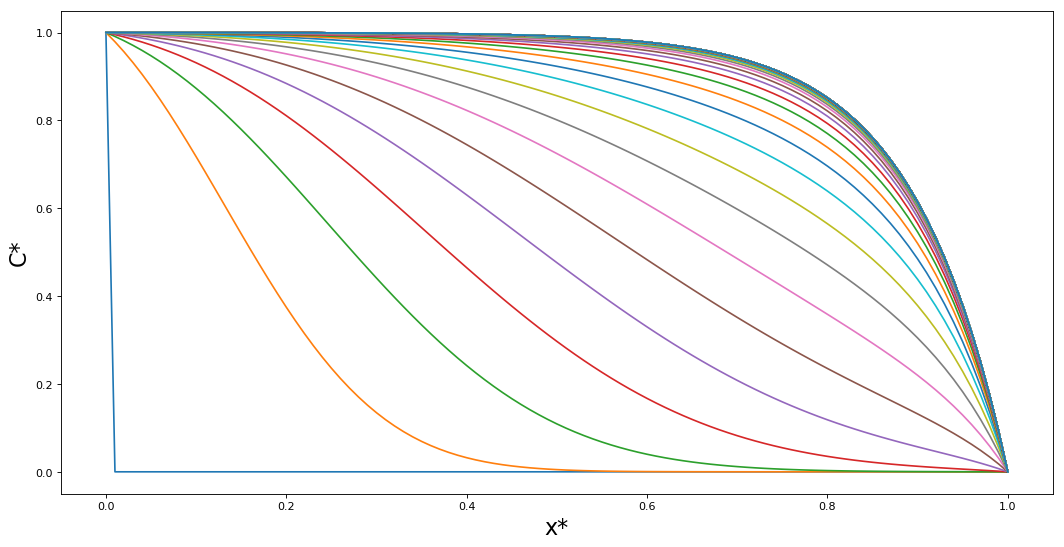

In [3]:
%pylab inline
imax=101
L=1.0
#set initial condition as zero concentration
Cold=zeros(imax)
Cnew=zeros(imax)

x=linspace(0,L,imax)

#set Peclet number
Pe = 10.0


dx=L/(imax-1)
#Time step set based on stability criterion
#advective stability criterion
dt=dx/(Pe)
#include diffusive stability criterion
dt = 0.2*min(dt,0.5*(dx**2))


#set inlet concentration
Cnew[0]=1.0
Cold[0]=1.0
t=0.0
tout=0.0
dtout=0.01


if (dt>dtout):
    dt=dtout
#run for 1.0 non-dimensional time steps
t_max = 1.0
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
xlabel('x*', fontsize=20)
ylabel('C*', fontsize=20)
plot(x,Cold)
tout+=dtout
#continue until the maximum time is exceeded
while (t<t_max):
    #explicitely set new concentration based on old concentration
    Cnew[1:-1]=dt*((1.0/(dx**2))*(Cold[2:]+Cold[:-2]-2.0*Cold[1:-1])-(Pe/dx)*(Cold[1:-1]-Cold[:-2]))+Cold[1:-1]
    t+=dt
    #plot a line at the specified time interval
    if (t>=tout):
        plot(x,Cnew)
        tout+=dtout
    #swap the old and the new arrays of concentration values
    Ctemp=Cold
    Cold=Cnew
    Cnew=Ctemp
show()

<div class="exercise">
<a id = "Exercise52"></a>
### Exercise 5.2 

Try showing that to solution to 

$$
\large{\frac{d^2 C^*}{d x^{*2}} = Pe \frac{d C^*}{dx^*}}
$$

is 

$$
\large{C^* = \frac{e^{Pe} - e^{Pe \hspace{0.1cm} x^*}}{e^{Pe} - 1}}
$$

assuming that $C^*$ is 1 at $x^* = 0$ and $C^*$ is 0 at $x^* = 1$. 

<div class="exercise">
<a id = "Exercise53"></a>   
### Exercise 5.3 

We wish to analyse a droplet of water emerging from a needle and, in particular, its average diameter $d_d$ when it detaches from a needle of diameter $d_n$

Initially we can assume that the droplets are being formed slowly. We therefore only need to consider the variables associated with the static shape: 
- Surface Tension, $\gamma$
- Gravity, $g$
- Water density, $\rho$

How many dimensionless groups are required to satisfy this system? Derive suitable ones. 

What additional variables may be required in a dynamic system? What additional dimensionless groups may this require?

<div class="exercise">
<a id = "Exercise55"></a>  
    
### Exercise 5.4 
    
We have 6 variables ($\rho$, $v$, $\lambda$, $r$, $l_{crit}$, $t_{crit}$) and 3 dimensions (M,L,T)
    
There are therefore 3 dimensionless groups.
    
Show that a suitable set are:
    
$$
\large{l^* = \frac{l_{crit}}{r}
\hspace{2cm}
t^* = t_{crit} \sqrt{\frac{\gamma}{\rho r^3}}
\hspace{2cm}
N_2 = \frac{v^2 \rho r}{\gamma}}
$$

If you wish to include viscosity, $\mu$, what would be an appropriate additional dimensionless group? Hint: It is mainly the inertia that the viscosity will be acting against

<div class="exercise">
<a id = "Exercise55"></a>  
    
### Exercise 5.5 
    
We wish to investigate the size of the instability generated - $h$
    
Derive  set of dimensionless groups to characterise this problem. Ensure that one of them represents a dimensionless height - $h^*$